In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gsp_python import gsp

In [5]:
df = pd.read_csv('dataset_preprocessed/time_series/time_series_SAX.csv')

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1,2,2,3,1,1,1,3,2,2,...,0,0,0,0,0,0,2,3,1,1
1,3,3,3,3,3,3,0,3,3,3,...,0,0,0,0,0,3,3,0,0,0
2,1,2,1,2,1,2,1,2,1,2,...,1,0,0,0,1,1,0,0,2,2
3,0,0,1,2,2,2,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3,0,3,0,0,0,3,3,0,0,...,0,3,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,3,3,0,0,0,0,3,3,3,...,0,3,3,0,3,0,3,3,0,0
9996,2,2,2,1,3,2,1,1,2,2,...,1,1,3,1,1,1,1,0,1,1
9997,3,3,1,1,3,2,1,3,3,1,...,2,3,3,2,1,2,3,1,2,3
9998,0,1,1,1,2,2,2,0,1,1,...,2,3,3,2,1,2,2,3,2,1


Formatting the dataframe as the correct input to GSP

In [7]:
X = df.values.tolist()
for i in range(len(X)):
    X[i] = [[i] for i in X[i]]
print(X[0])
print(X[1])
print(X[9999])

[[1], [2], [2], [3], [1], [1], [1], [3], [2], [2], [3], [3], [3], [3], [1], [2], [3], [2], [3], [3], [3], [3], [3], [3], [3], [3], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [1], [1], [1], [0], [0], [0], [0], [2], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [2], [3], [1], [1]]
[[3], [3], [3], [3], [3], [3], [0], [3], [3], [3], [0], [0], [0], [0], [3], [0], [3], [3], [0], [0], [0], [0], [3], [0], [3], [3], [0], [0], [0], [3], [0], [3], [0], [3], [3], [0], [0], [0], [0], [0], [0], [0], [3], [0], [3], [0], [3], [0], [0], [0], [3], [3], [0], [0], [0], [0], [0], [0], [0], [3], [3], [0], [0], [0]]
[[1], [1], [1], [1], [3], [3], [3], [3], [1], [1], [1], [3], [3], [1], [3], [1], [3], [3], [1], [1], [3], [1], [3], [3], [3], [3], [1], [3], [3], [1], [0], [1], [1], [1], [0], [1], [1], [3], [1], [1], [0], [0], [3], [1], [1], [1], [1], [1], [3], [1], [1], [3], [3], [3], [3], [1], [3], [3], [3], [3], [1], [3], [3], [3]]


# Constrained SPM

In [5]:
resultsize_list =[]
for minsup in np.linspace(0.5, 0.1, 9):
    print('Calculating frequent sequences for minsup =', np.round(minsup, 2))
    gsp_obj = gsp.GSP(ds=X, minsup=np.round(minsup, 2), maxgap=2, mingap=1, maxspan=8, max_k=10)
    result = gsp_obj.run_gsp()

    resultsize_list.append(len(result))

Calculating frequent sequences for minsup = 0.5
Calculating frequent sequences for minsup = 0.45
Calculating frequent sequences for minsup = 0.4
Calculating frequent sequences for minsup = 0.35
Calculating frequent sequences for minsup = 0.3
Calculating frequent sequences for minsup = 0.25
Calculating frequent sequences for minsup = 0.2
Calculating frequent sequences for minsup = 0.15
Calculating frequent sequences for minsup = 0.1


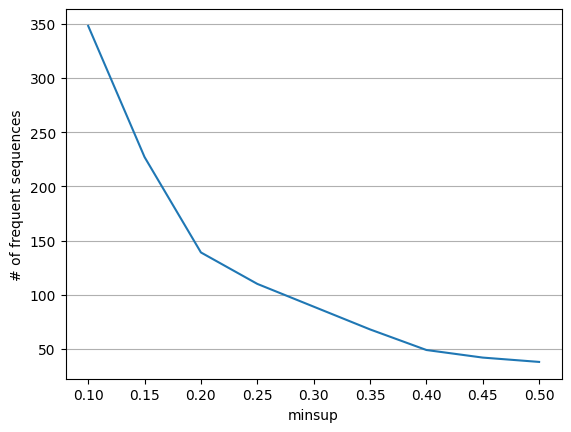

In [7]:
plt.plot(np.linspace(0.5, 0.1, 9), resultsize_list)
plt.xlabel('minsup')
plt.ylabel('# of frequent sequences')
plt.grid(axis='y')

plt.savefig('./img/SPM/frequent_sequences_vs_minsup_CONSTRAINED.png', dpi=300, bbox_inches='tight')

plt.show()

In [9]:
gsp_obj = gsp.GSP(ds=X, minsup=0.2, maxgap=2, mingap=1, maxspan=8, max_k=10)
result = gsp_obj.run_gsp()

In [10]:
from collections import defaultdict

# Create a dictionary to store the sequences for each length
sequences_by_length = defaultdict(list)

# Iterate over the result list and store the sequences by length
for sequence, support in result:
    length = len(sequence)
    sequences_by_length[length].append((sequence, support))

# Sort the sequences by support in descending order
for length, sequences in sequences_by_length.items():
    sequences.sort(key=lambda x: x[1], reverse=True)

# Print the top 3 sequences for each length
for length, sequences in sequences_by_length.items():
    print(f"Top 3 sequences of length {length}:")
    for sequence, support in sequences[:3]:
        print(sequence, support)
    print()

Top 3 sequences of length 1:
[[3]] 9992
[[0]] 9956
[[1]] 8141

Top 3 sequences of length 2:
[[3], [3]] 8504
[[1], [1]] 8039
[[1], [0]] 7870

Top 3 sequences of length 3:
[[1], [1], [1]] 7304
[[1], [1], [0]] 6122
[[3], [1], [1]] 5819

Top 3 sequences of length 4:
[[1], [1], [1], [1]] 5488
[[2], [1], [1], [1]] 4178
[[3], [1], [1], [1]] 4060

Top 3 sequences of length 5:
[[1], [1], [1], [1], [1]] 3583
[[3], [1], [1], [1], [1]] 2698
[[1], [1], [1], [1], [3]] 2637

Top 3 sequences of length 6:
[[1], [1], [1], [1], [1], [1]] 2161

